In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats

warnings.filterwarnings('ignore')


In [2]:
#creating database connection
conn = sqlite3.connect('Inventory.db')

# Load CSV
sales_df = pd.read_csv("data/sales.csv")

# Insert into sales table (replace existing data if needed)
sales_df.to_sql("sales", conn, if_exists="replace", index=False)

# Fetch vendor summary data BEFORE closing
df = pd.read_sql_query("select * from vendor_sales_summary", conn)

conn.commit()
conn.close()

print("✅ Sales data loaded into DB!")
print(df.head())


✅ Sales data loaded into DB!
   VendorNumber                VendorName  Brand  ActualPrice  \
0          1128         BROWN-FORMAN CORP   1233        36.99   
1          4425     MARTIGNETTI COMPANIES   3405        28.99   
2         17035         PERNOD RICARD USA   8068        24.99   
3          3960  DIAGEO NORTH AMERICA INC   4261        22.99   
4          3960  DIAGEO NORTH AMERICA INC   3545        29.99   

               Description  PurchasePrice  Volume  TotalPurchaseQuantity  \
0  Jack Daniels No 7 Black          26.27  1750.0                 145080   
1    Tito's Handmade Vodka          23.19  1750.0                 164038   
2         Absolut 80 Proof          18.24  1750.0                 187407   
3   Capt Morgan Spiced Rum          16.17  1750.0                 201682   
4          Ketel One Vodka          21.89  1750.0                 138109   

   TotalPurchaseDollars  TotalSalesQuantity  TotalSalesDollars  \
0            3811251.60                 0.0              

In [3]:
# Close after insert
conn.close()

# Reconnect for reading
conn = sqlite3.connect('Inventory.db')
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
conn.close()

print(df.head())


   VendorNumber                VendorName  Brand  ActualPrice  \
0          1128         BROWN-FORMAN CORP   1233        36.99   
1          4425     MARTIGNETTI COMPANIES   3405        28.99   
2         17035         PERNOD RICARD USA   8068        24.99   
3          3960  DIAGEO NORTH AMERICA INC   4261        22.99   
4          3960  DIAGEO NORTH AMERICA INC   3545        29.99   

               Description  PurchasePrice  Volume  TotalPurchaseQuantity  \
0  Jack Daniels No 7 Black          26.27  1750.0                 145080   
1    Tito's Handmade Vodka          23.19  1750.0                 164038   
2         Absolut 80 Proof          18.24  1750.0                 187407   
3   Capt Morgan Spiced Rum          16.17  1750.0                 201682   
4          Ketel One Vodka          21.89  1750.0                 138109   

   TotalPurchaseDollars  TotalSalesQuantity  TotalSalesDollars  \
0            3811251.60                 0.0                0.0   
1            3804041

In [4]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10693.0,10649.892921,18752.805318,2.00,3951.00,7153.00,9552.00,201359.00
Brand,10693.0,18037.744319,12662.525384,58.00,5789.00,18761.00,25514.00,90631.00
ActualPrice,10693.0,35.640338,148.239484,0.00,10.99,15.99,28.99,7499.99
PurchasePrice,10693.0,24.383023,109.264519,0.00,6.84,10.45,19.47,5681.81
Volume,10693.0,847.351445,664.278813,50.00,750.00,750.00,750.00,20000.00
TotalPurchaseQuantity,10693.0,3140.781539,11094.573249,1.00,36.00,262.00,1978.00,337660.00
TotalPurchaseDollars,10693.0,30103.877820,123062.388765,0.00,453.18,3655.23,20733.42,3811251.60
TotalSalesQuantity,10693.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
TotalSalesDollars,10693.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
TotalSalesPrice,10693.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00


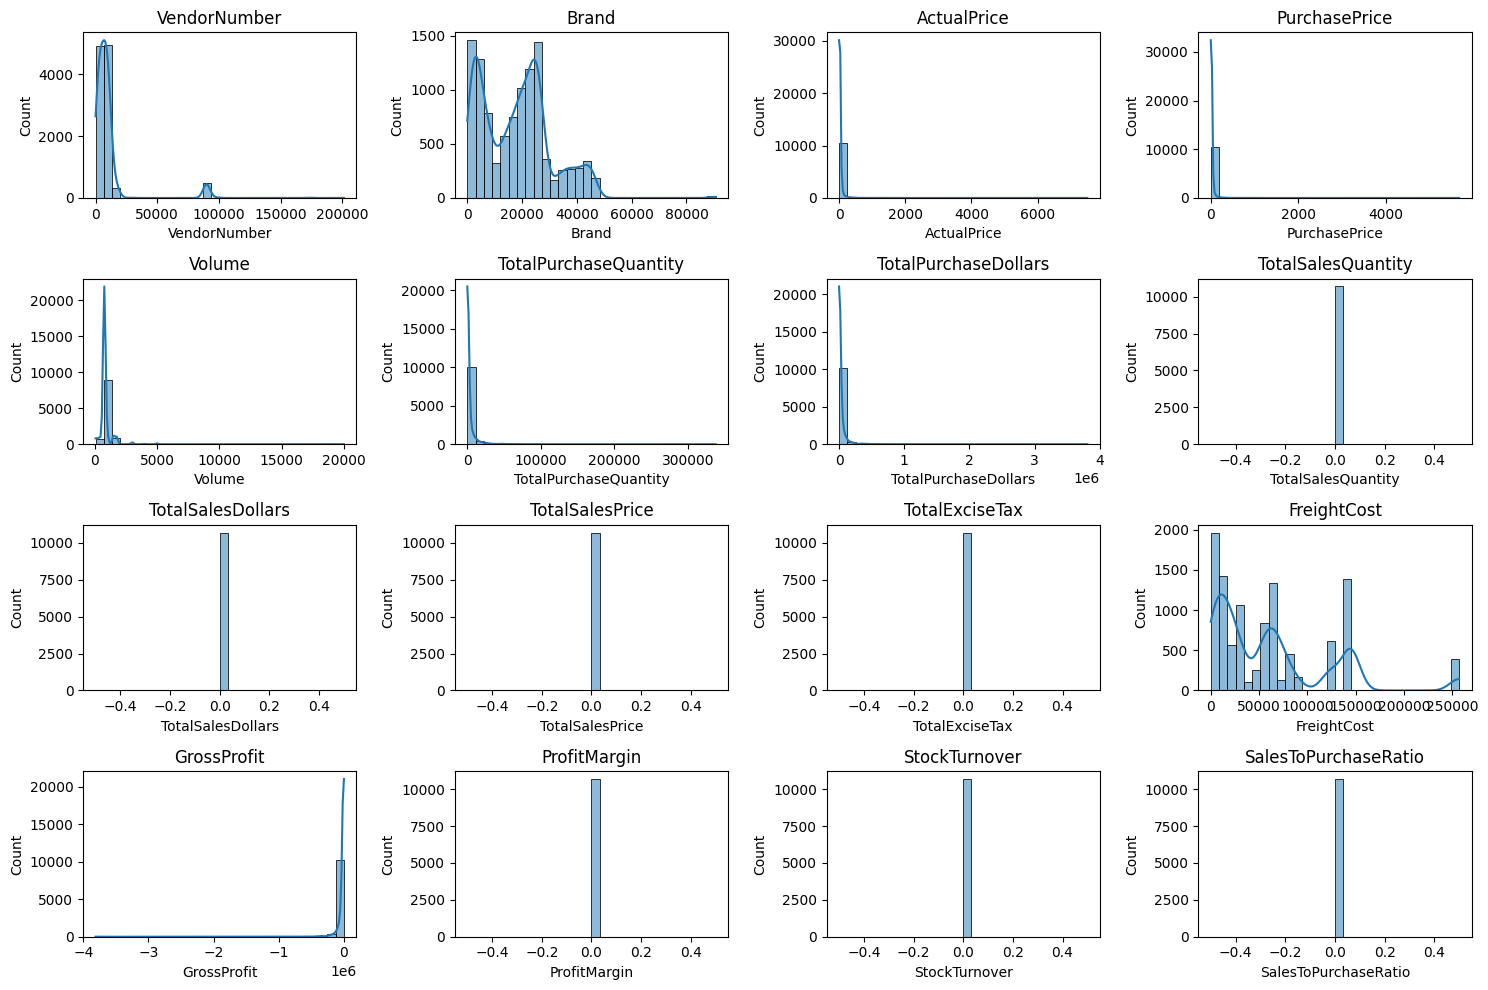

In [5]:
#Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #adjust grid layout as needed
    sns.histplot(df[col], kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

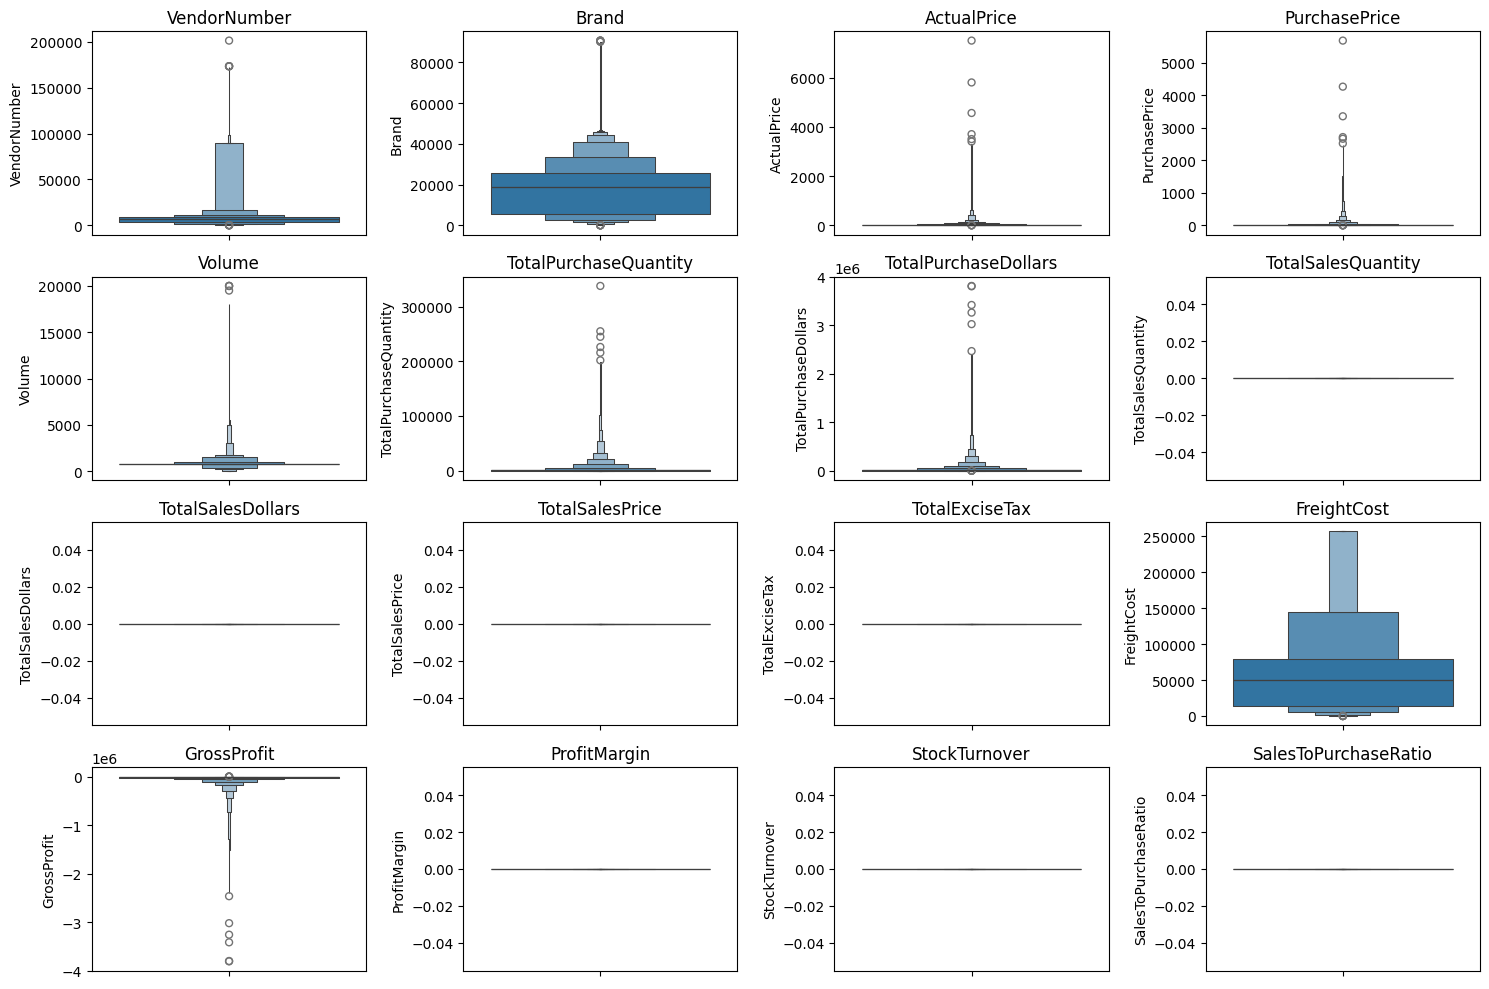

In [6]:
#outlier detection with boxplots
plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #adjust grid layout as needed
    sns.boxenplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [7]:
df

,VendorNumber,VendorName,Brand,ActualPrice,Description,PurchasePrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,36.99,Jack Daniels No 7 Black,26.27,1750.0,145080,3811251.60,0.0,0.0,0.0,0.0,68601.68,-3811251.60,0,0.0,0.0
1,4425,MARTIGNETTI COMPANIES,3405,28.99,Tito's Handmade Vodka,23.19,1750.0,164038,3804041.22,0.0,0.0,0.0,0.0,144929.24,-3804041.22,0,0.0,0.0
2,17035,PERNOD RICARD USA,8068,24.99,Absolut 80 Proof,18.24,1750.0,187407,3418303.68,0.0,0.0,0.0,0.0,123780.22,-3418303.68,0,0.0,0.0
3,3960,DIAGEO NORTH AMERICA INC,4261,22.99,Capt Morgan Spiced Rum,16.17,1750.0,201682,3261197.94,0.0,0.0,0.0,0.0,257032.07,-3261197.94,0,0.0,0.0
4,3960,DIAGEO NORTH AMERICA INC,3545,29.99,Ketel One Vodka,21.89,1750.0,138109,3023206.01,0.0,0.0,0.0,0.0,257032.07,-3023206.01,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,8004,SAZERAC CO INC,5683,0.49,Dr McGillicuddy's Apple Pie,0.39,50.0,6,2.34,0.0,0.0,0.0,0.0,50293.62,-2.34,0,0.0,0.0
10689,3924,HEAVEN HILL DISTILLERIES,9123,0.99,Deep Eddy Vodka,0.74,50.0,2,1.48,0.0,0.0,0.0,0.0,14069.87,-1.48,0,0.0,0.0
10690,3960,DIAGEO NORTH AMERICA INC,6127,1.99,The Club Strawbry Margarita,1.47,200.0,1,1.47,0.0,0.0,0.0,0.0,257032.07,-1.47,0,0.0,0.0
10691,7245,PROXIMO SPIRITS INC.,3065,0.99,Three Olives Grape Vodka,0.71,50.0,1,0.71,0.0,0.0,0.0,0.0,38994.78,-0.71,0,0.0,0.0


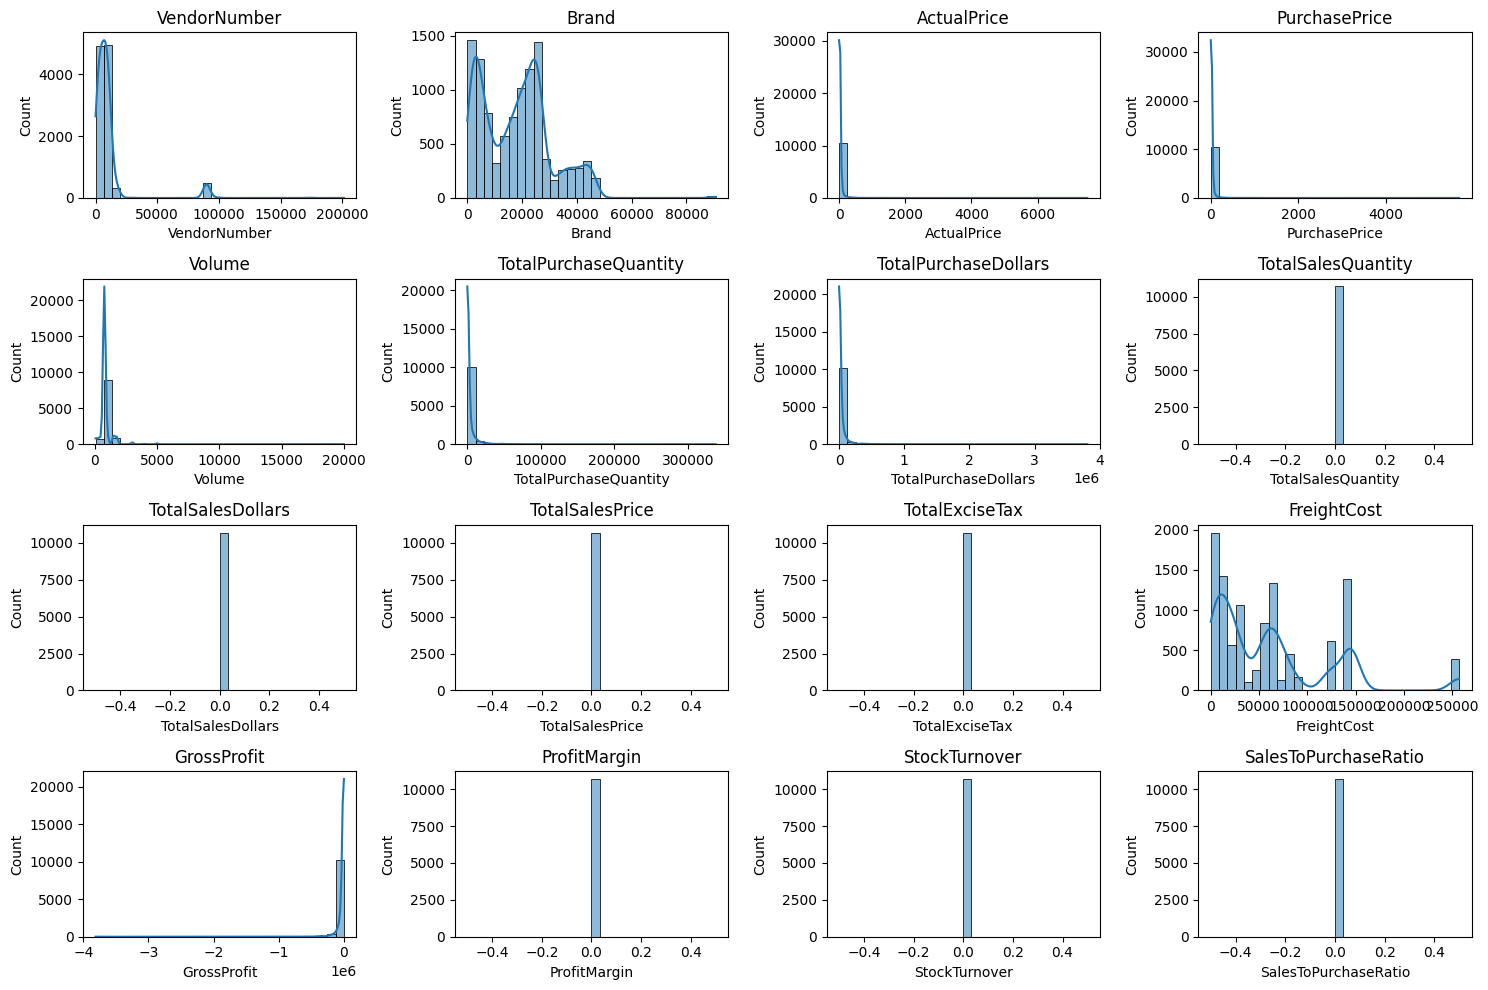

In [8]:
#Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #adjust grid layout as needed
    sns.histplot(df[col], kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

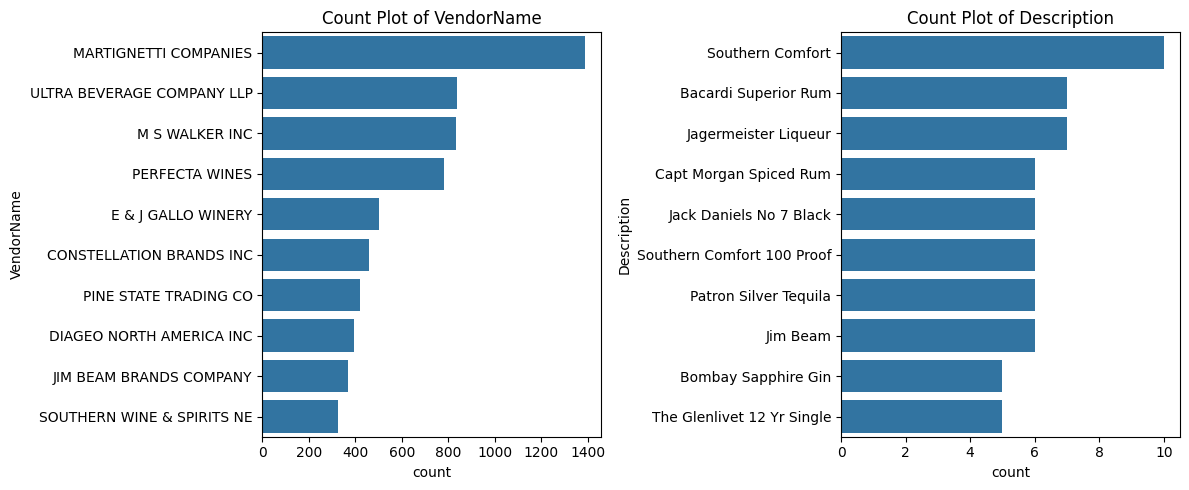

In [9]:
# Count plot for categorical columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)  # adjust grid layout as needed
    top_categories = df[col].value_counts().index[:10]  # top 10 categories
    sns.countplot(y=df[col], order=top_categories)
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()


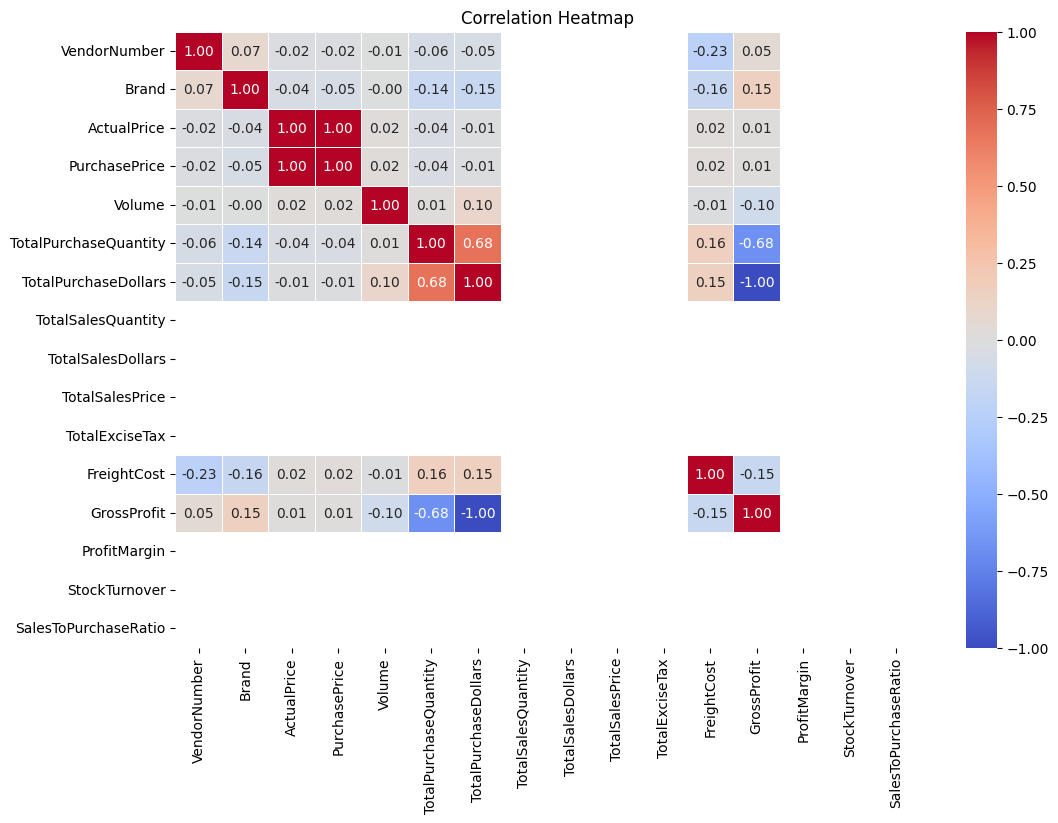

In [10]:
plt.figure(figsize=(12, 8))
correlation_matix = df[numerical_cols].corr()
sns.heatmap(correlation_matix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# ✅ Reconnect to the database
conn = sqlite3.connect("Inventory.db")
# Check if there are matches between Brand in both tables
match_check = pd.read_sql_query("""
SELECT COUNT(*) as matched_rows
FROM vendor_sales_summary v
JOIN sales s ON v.Brand = s.Brand
""", conn)

print(match_check)

# Close after checking
conn.close()

   matched_rows
0      12887278


In [43]:
conn = sqlite3.connect("Inventory.db")

# Quick check — total sales dollars in the sales table
sales_summary = pd.read_sql_query("""
SELECT COUNT(*) AS row_count, 
       SUM(SalesDollars) AS total_sales
FROM sales
""", conn)

print(sales_summary)

# Quick join check with aggregation
df_check = pd.read_sql_query("""
SELECT v.VendorName, 
       SUM(s.SalesDollars) AS total_sales_dollars
FROM vendor_sales_summary v
JOIN sales s ON v.Brand = s.Brand
GROUP BY v.VendorName
ORDER BY total_sales_dollars DESC
LIMIT 10
""", conn)

print(df_check)



   row_count   total_sales
0   12825363  4.520630e+08
                   VendorName  total_sales_dollars
0    DIAGEO NORTH AMERICA INC          68739834.97
1       MARTIGNETTI COMPANIES          41077069.06
2           PERNOD RICARD USA          32279544.17
3     JIM BEAM BRANDS COMPANY          31898621.16
4             BACARDI USA INC          25005365.79
5    CONSTELLATION BRANDS INC          24467134.23
6           BROWN-FORMAN CORP          19339904.49
7          E & J GALLO WINERY          18553774.66
8  ULTRA BEVERAGE COMPANY LLP          17842866.80
9              M S WALKER INC          15459784.05


In [ ]:
# ✅ Use the join query instead of vendor_sales_summary alone
query = """
SELECT 
    v.VendorNumber,
    v.VendorName,
    v.Brand,
    v.Description,
    v.PurchasePrice,
    v.Volume AS PurchaseVolume,
    v.TotalPurchaseQuantity,
    v.TotalPurchaseDollars,
    SUM(s.SalesQuantity) AS TotalSalesQuantity,
    SUM(s.SalesDollars) AS TotalSalesDollars,
    AVG(s.SalesPrice) AS TotalSalesPrice,
    SUM(s.ExciseTax) AS TotalExciseTax,
    v.FreightCost,
    SUM(s.SalesDollars) - v.TotalPurchaseDollars AS GrossProfit,
    CASE 
        WHEN SUM(s.SalesDollars) = 0 THEN 0
        ELSE (SUM(s.SalesDollars) - v.TotalPurchaseDollars) / SUM(s.SalesDollars)
    END AS ProfitMargin,
    CASE 
        WHEN v.TotalPurchaseQuantity = 0 THEN 0
        ELSE SUM(s.SalesQuantity) / v.TotalPurchaseQuantity
    END AS StockTurnover,
    CASE 
        WHEN v.TotalPurchaseDollars = 0 THEN 0
        ELSE SUM(s.SalesDollars) / v.TotalPurchaseDollars
    END AS SalesToPurchaseRatio
FROM vendor_sales_summary v
JOIN sales s ON v.Brand = s.Brand
GROUP BY 
    v.VendorNumber, v.VendorName, v.Brand, v.Description
"""

df = pd.read_sql_query(query, conn)

# ✅ Close after query
conn.close()

# ✅ Check results
print(df[['TotalSalesQuantity', 'TotalSalesDollars', 'ProfitMargin']].describe())

In [44]:
df = pd.read_sql_query("select * from vendor_sales_summary", conn)


In [45]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin' : 'mean'}).reset_index()


In [46]:
df['TotalSalesDollars'] = pd.to_numeric(df['TotalSalesDollars'], errors='coerce')
df['ProfitMargin'] = pd.to_numeric(df['ProfitMargin'], errors='coerce')


In [47]:
# Calculate thresholds
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [48]:
# Filter brands
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]


In [49]:
# Keep only brands under $1000 sales
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 1000]

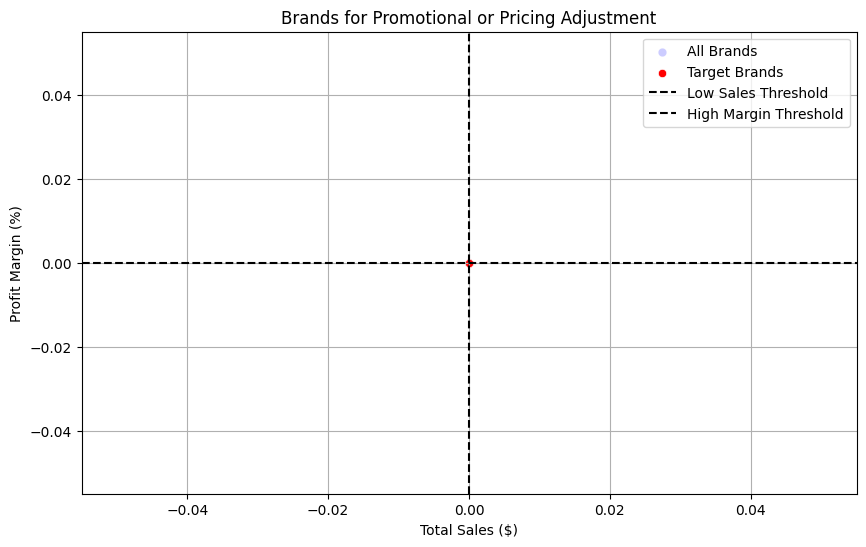

In [50]:
plt.figure(figsize=(10, 6))

# All brands in blue
sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="blue",
    label="All Brands",
    alpha=0.2
)

# Target brands in red
sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="red",
    label="Target Brands"
)

# Threshold lines
plt.axvline(low_sales_threshold, linestyle='--', color="black", label="Low Sales Threshold")
plt.axhline(high_margin_threshold, linestyle='--', color="black", label="High Margin Threshold")

# Labels and title
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [21]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors
top_brands 


Description
(RI) 1                          0.0
.nparalleled Svgn Blanc         0.0
10 Span Cab Svgn CC             0.0
10 Span Chard CC                0.0
10 Span Pnt Gris Monterey Cy    0.0
10 Span Pnt Nr CC               0.0
1000 Stories Znfdl              0.0
12 Days of Pearls Gift Set      0.0
13 Celsius Svgn Bl              0.0
13th Colony Sthrn Corn Whsky    0.0
Name: TotalSalesDollars, dtype: float64

In [22]:
top_brands 


Description
(RI) 1                          0.0
.nparalleled Svgn Blanc         0.0
10 Span Cab Svgn CC             0.0
10 Span Chard CC                0.0
10 Span Pnt Gris Monterey Cy    0.0
10 Span Pnt Nr CC               0.0
1000 Stories Znfdl              0.0
12 Days of Pearls Gift Set      0.0
13 Celsius Svgn Bl              0.0
13th Colony Sthrn Corn Whsky    0.0
Name: TotalSalesDollars, dtype: float64

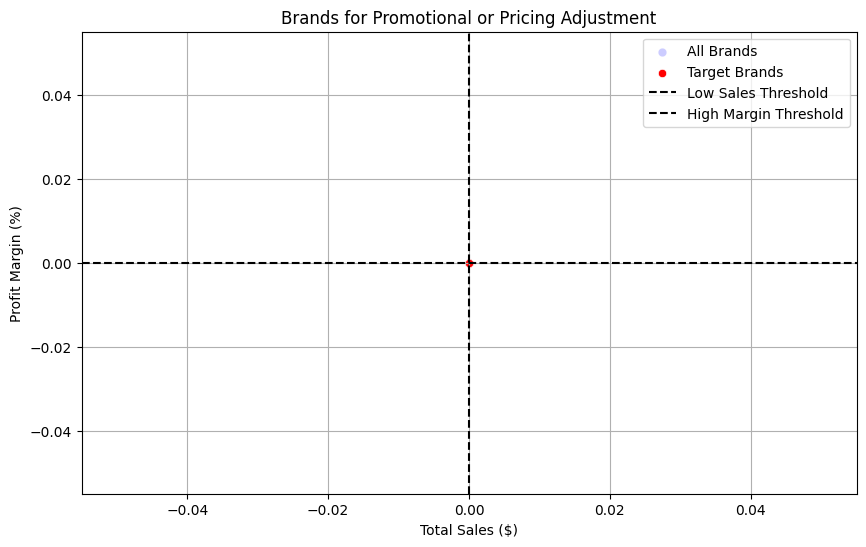

In [23]:
# Calculate thresholds
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

# Filter brands
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

# Keep only brands under $1000 sales
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 1000]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin',
                color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin',
                color="red", label="Target Brands")

plt.axvline(low_sales_threshold, linestyle='--', color="black", label="Low Sales Threshold")
plt.axhline(high_margin_threshold, linestyle='--', color="black", label="High Margin Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [28]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars']

In [ ]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,AAPER ALCOHOL & CHEMICAL CO,105.07,-105.07,0.0,1.0
1,ADAMBA IMPORTS INTL INC,76770.25,-76770.25,0.0,1.0
2,ALISA CARR BEVERAGES,34951.68,-34951.68,0.0,1.0
3,ALTAMAR BRANDS LLC,11706.20,-11706.20,0.0,1.0
4,AMERICAN SPIRITS EXCHANGE,1205.16,-1205.16,0.0,1.0
...,...,...,...,...,...
123,WEIN BAUER INC,43517.00,-43517.00,0.0,1.0
124,WESTERN SPIRITS BEVERAGE CO,361249.21,-361249.21,0.0,1.0
125,WILLIAM GRANT & SONS INC,5960744.35,-5960744.35,0.0,1.0
126,WINE GROUP INC,5258636.79,-5258636.79,0.0,1.0


In [ ]:
#Display top 10 vendor
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] =  top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] =  top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] =  top_vendors['GrossProfit'].apply(format_dollars)
top_vendors



In [ ]:
top_vendors['PurchaseContribution%'].sum()

In [ ]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()
top_vendors

In [ ]:
fig,ax1=plt.subplot(figsize=(10,6))
#bar plot for purchase conntribution%
sns.barplot(x=topp_vendors['VendorName'], y=top_vendors['Purchase_Contribution'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white')

#line plot for cumulative contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution%', color='blue')
ax2.set_ylabel('Cumulative Contribution%', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart:Vendor Contribution to total Purchase')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()



In [ ]:
print(f"Total Purchase Contribution of top 10 vendor is {round(top_vendors['Purchase_Contribution%'].sum(),2)} %")

In [ ]:
vendors = list(top_vendors['VendorsNmae'].values)
purchase_contribution = list(top_vendors['Purchase_Contribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

#append other vendors category
vendors.append("other Vendors")
purchase_contribution.append(remaining_contribution)

fig, ax = plt.Subplot(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contribution, labels=vendors, autopct='%1.1f%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

#Draw a white circle in the center to create a donut effect

center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

#add total contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center',va='center')

plt.title("Top 10 vendor's Purchase Contribution (%)")
plt.show()

In [ ]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [ ]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [ ]:
df['OrderSize', 'TotalPurchaseQuantity']

In [ ]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

In [ ]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending= True).head(10)

In [ ]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df("UnsoldInventoryValue").sum()))

In [ ]:
#Aggregate Capital Locked per vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

#sort vendors with the highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascend=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

In [ ]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [ ]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()


In [ ]:
top_vendors

In [ ]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2,df=len(data) -1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

In [ ]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean:{top_mean:.2f}")
print(f"low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean:{low_mean:.2f}")

#Top vendor plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

#Low vendor plot
sns.histplot(top_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Low Mean: {low_mean:.2f}")






